In [1]:
import os, sys
import numpy as np

from scipy import linalg as LN
import math as m
import matplotlib.pyplot as plt

import cvxpy as cp
import tabulate
import time
import logging

from PSO import PSO

In [2]:
start = time.time()

gamma = np.array([0.3,5.0])
n_particles = 50
param_dict = {
    'n_params': 2,
    'n_particles': n_particles,
    'max_iter': 10000,
    'c0': gamma,
    'c1': gamma,
    'w': 0.9,
    'xl': np.array([0.001, 0.5]),
    'xu': np.array([1.0, 20.0]),
    'vl': np.array([0.0001, 0.001]),
    'vu': np.array([0.2, 2.0]),
    'count_max': 30,
    'gamma':gamma
}


In [3]:
BASE_DIR = os.getcwd()
    
os.chdir("../")
path = os.getcwd()
sys.path.append(path) # 폴더 두 단계 위에서 file import 하기 위해서 sys path 설정  

from Lyapunov_SDP_Stability.analyze_stability import cal_Nvariable, run_timeseries, draw_graph
## Import the function that optimize   
from Lyapunov_SDP_Stability.analyze_stability import lyapunov, common_lyapunov, run_time_minimize 

Draw the Frequency Plot
Draw the Active Power Plot


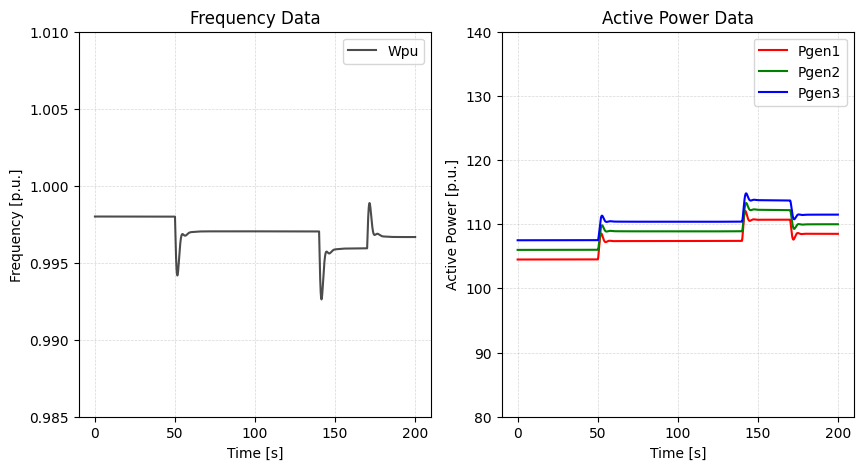

Draw Graph Time: 5.9389488697052 secs


In [4]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8.0,
            'ki1': 2.5,
            'ki2': 0.03,
            'kc1' : 0.8,
            'Tl1' : 2.4
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0005, 0, -0.0005])

scenario = 'droop'
#scenario = 'droop'
load_pattern = [80,80,110, 90]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge1, U = run_timeseries(gen_dict, con_dict, case_dict, scenario )
draw_graph(X_nudge1, gen_dict, case_dict, scenario )

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


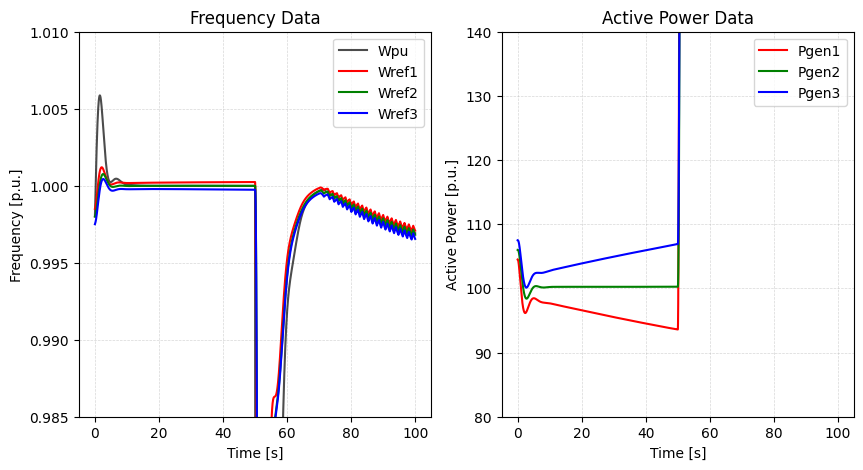

Draw Graph Time: 5.518235206604004 secs


In [14]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8.0,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.0031,
            'Tl1' : 2.4
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0005, 0, -0.0005])

scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 100, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge1, U = run_timeseries(gen_dict, con_dict, case_dict, 'nudge')
draw_graph(X_nudge1, gen_dict, case_dict, 'nudge')

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


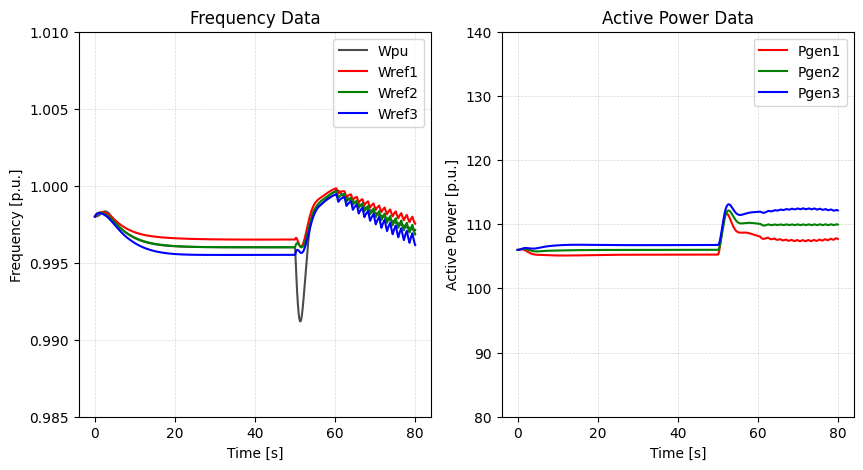

Lyapunov Simulation Time: 4.430035829544067 secs


In [6]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8.0,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.1,
            'Tl1' : 2.4
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0005, 0, -0.0005])

scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 80, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge2, U = run_timeseries(gen_dict, con_dict, case_dict, 'nudge')
draw_graph(X_nudge2, gen_dict, case_dict, 'nudge')

In [1]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8.0,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.0031,
            'Tl1' : 10.0
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0005, 0, -0.0005])

scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 80, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge3, U = run_timeseries(gen_dict, con_dict, case_dict, 'nudge')
draw_graph(X_nudge3, gen_dict, case_dict, 'nudge')

NameError: name 'np' is not defined

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


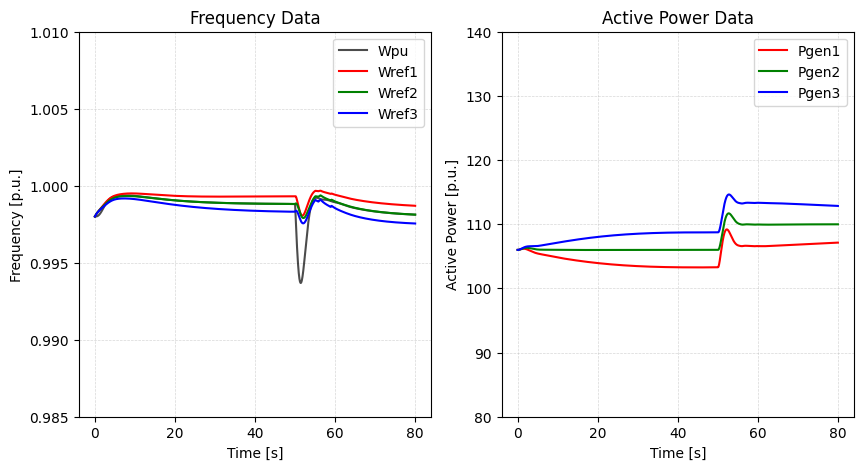

Lyapunov Simulation Time: 4.310000419616699 secs


In [8]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8.0,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.03,
            'Tl1' : 10.0
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0005, 0, -0.0005])

scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 80, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge4, U = run_timeseries(gen_dict, con_dict, case_dict, 'nudge')
draw_graph(X_nudge4, gen_dict, case_dict, 'nudge')

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


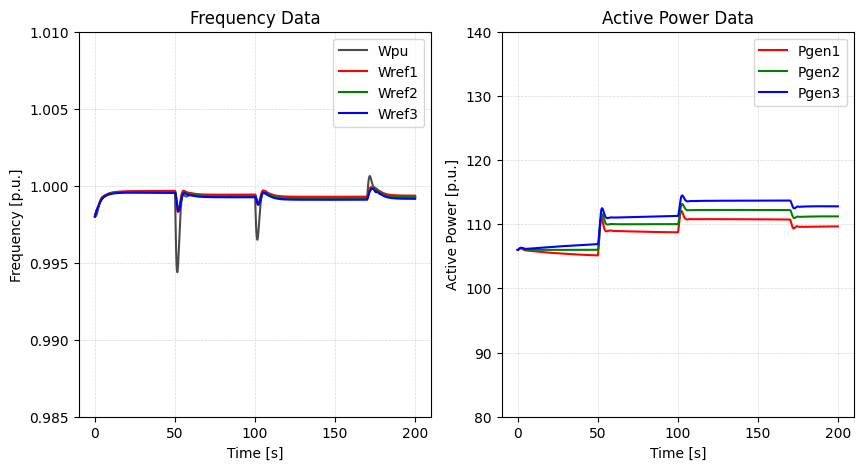

Lyapunov Simulation Time: 10.620030164718628 secs


In [9]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.01,
            'Tl1' : 1.76
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])

#scenario = 'secondPI'
scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge5, U = run_timeseries(gen_dict, con_dict, case_dict, scenario)
draw_graph(X_nudge5, gen_dict, case_dict, 'nudge')

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


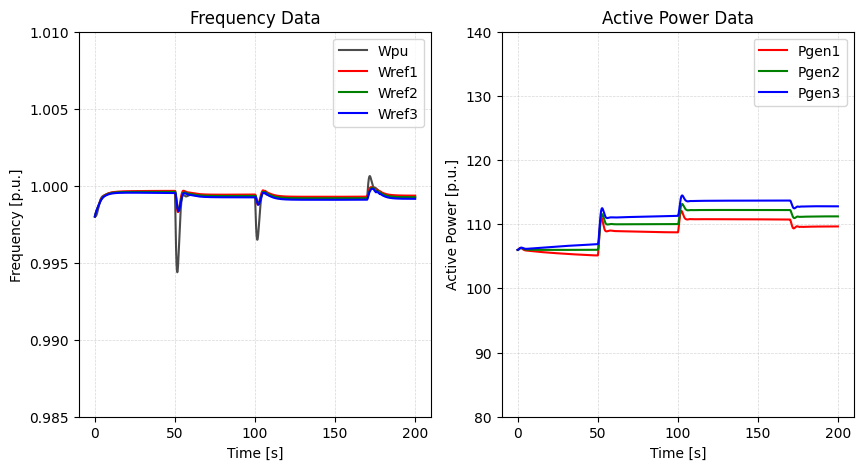

Lyapunov Simulation Time: 11.061001539230347 secs


In [10]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.01,
            'Tl1' : 2.4
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])

#scenario = 'secondPI'
scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge5, U = run_timeseries(gen_dict, con_dict, case_dict, scenario)
draw_graph(X_nudge5, gen_dict, case_dict, 'nudge')

In [ ]:

#from analyze_stability import lyapunov
#pso = PSO(lyapunov, param_dict)
#pso1 = PSO(common_lyapunov, param_dict)
pso2 = PSO(run_time_minimize, param_dict)
end = time.time()

.0 0 [0.1259 6.5282] 279913.8960299
............................................................................................................1 1 [0.1259 6.5282] 279913.8960299
........................................................................................................2 2 [0.1259 6.5282] 279913.8960299
.........................................................................................................3 3 [0.1259 6.5282] 279913.8960299
...........................................................................................................4 4 [0.1259 6.5282] 279913.8960299
..............................................................................................................5 5 [0.1259 6.5282] 279913.8960299
....................................................................................................................6 0 [ 0.1126 10.    ] 278987.8144492
......................................................................................................

In [12]:
#from analyze_stability import lyapunov
#pso = PSO(lyapunov, param_dict)
#pso1 = PSO(common_lyapunov, param_dict)
pso2 = PSO(run_time_minimize, param_dict)
end = time.time()

.0 0 [0.0933 5.3405] 276586.4262605
...................................................................................................................................1 0 [0.0846 8.4193] 276063.3959186
...........................................................................................................2 1 [0.0846 8.4193] 276063.3959186
............................................................................................................................3 0 [ 0.1067 20.    ] 276000.3128312
....................................................................................................................................4 0 [ 0.0323 20.    ] 274028.1245848
....................................................................................................................................5 0 [1.14e-02 2.00e+01] 272924.4243491
................................................................................................................................6 1 [1.14e-02 2.00e+01] 272

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


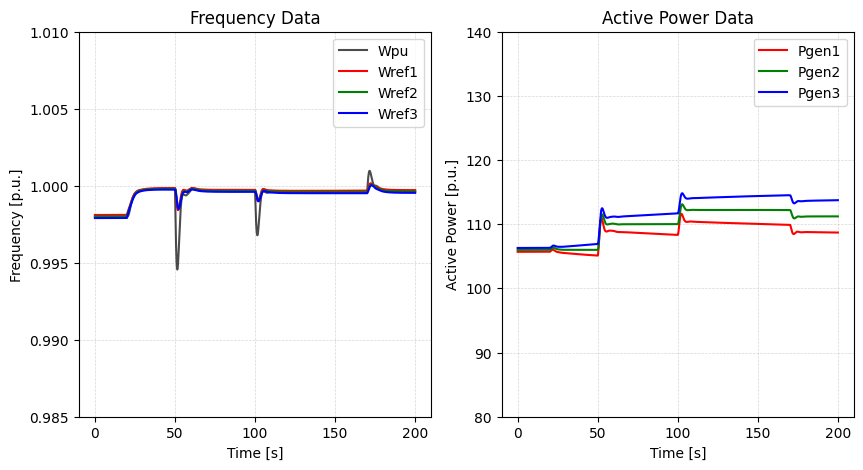

Draw Graph Time: 10.509196519851685 secs


In [5]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.005,
            'Tl1' : 0.5
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])

#scenario = 'secondPI'
scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge6, U = run_timeseries(gen_dict, con_dict, case_dict, scenario)
draw_graph(X_nudge6, gen_dict, case_dict, 'nudge')

In [14]:
(end - start)/60

7614.600061154366

In [6]:
start = time.time()
#from analyze_stability import lyapunov
#pso = PSO(lyapunov, param_dict)
#pso1 = PSO(common_lyapunov, param_dict)
pso2 = PSO(run_time_minimize, param_dict)
end = time.time()

print("spent time:", end - start)

.0 0 [0.0089 4.5657] 272963.4057411
..................................................................................................................................1 1 [0.0089 4.5657] 272963.4057411
..............................................................................................................2 2 [0.0089 4.5657] 272963.4057411
....................................................................................................................3 3 [0.0089 4.5657] 272963.4057411
..........................................................................................................................4 0 [7.30000e-03 1.30416e+01] 272764.3834552
............................................................................................................................5 1 [7.30000e-03 1.30416e+01] 272764.3834552
......................................................................................................6 2 [7.30000e-03 1.30416e+01] 272764.3834552
....................

Draw the Frequency Plot
Draw the Active Power Plot


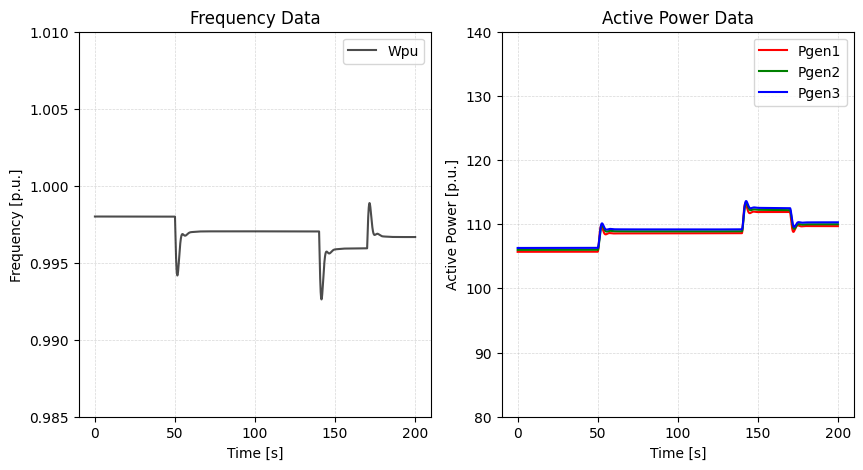

Draw Graph Time: 6.266568183898926 secs


In [8]:

scenario = 'droop'
#scenario = 'droop'
load_pattern = [80,80,110, 90]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge1, U = run_timeseries(gen_dict, con_dict, case_dict, scenario )
draw_graph(X_nudge1, gen_dict, case_dict, scenario )

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


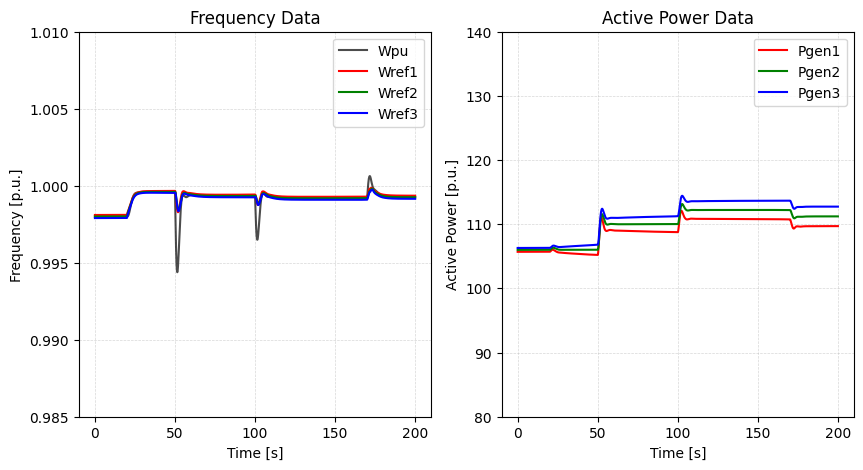

Draw Graph Time: 10.989328145980835 secs


In [4]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.01,
            'Tl1' : 2.4
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])

#scenario = 'secondPI'
scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge8, U = run_timeseries(gen_dict, con_dict, case_dict, scenario)
draw_graph(X_nudge8, gen_dict, case_dict, 'nudge')

In [5]:
Ndist = int(20*1/Ts)
sum_cost = 0
sum_cost += np.sum(abs(X_nudge8[0, Ndist+2:]))

In [6]:
print(sum_cost)

2827.404228586239


In [9]:
idx = 1+0*cal_Nvariable(scenario)
a1 = np.sum(abs(X_nudge8[idx, Ndist+2:]))
idy = 1+1*cal_Nvariable(scenario)
a2 = np.sum(abs(X_nudge8[idy, Ndist+2:]))
idz = 1+2*cal_Nvariable(scenario)
a3 = np.sum(abs(X_nudge8[idz, Ndist+2:]))

dudeA = np.sum(abs(X_nudge8[idx, Ndist+2:] - X_nudge8[idy, Ndist+2:]))
dudeB = np.sum(abs(X_nudge8[idy, Ndist+2:] - X_nudge8[idz, Ndist+2:]))
print(a1,a2,a3)
print(dudeA, dudeB)

221275.5458791682 249648.89738148366 278278.3757171237
28474.33280476172 28629.47833564016


In [4]:
start = time.time()
#from analyze_stability import lyapunov
#pso = PSO(lyapunov, param_dict)
#pso1 = PSO(common_lyapunov, param_dict)
pso2 = PSO(run_time_minimize, param_dict)
end = time.time()

print("spent time:", end - start)

.0 0 [0.0464 4.7827] 60302.4429992
.....................................................................................................................1 1 [0.0464 4.7827] 60302.4429992
............................................................................................................2 2 [0.0464 4.7827] 60302.4429992
......................................................................................................3 3 [0.0464 4.7827] 60302.4429992
.........................................................................................................................4 4 [0.0464 4.7827] 60302.4429992
........................................................................................................................................5 0 [ 0.0482 12.6797] 57931.3103978
........................................................................................................................................6 0 [ 0.0417 20.    ] 56109.7987485
.....................................

Draw the Frequency Plot
Draw the Wref Plot
Draw the Active Power Plot


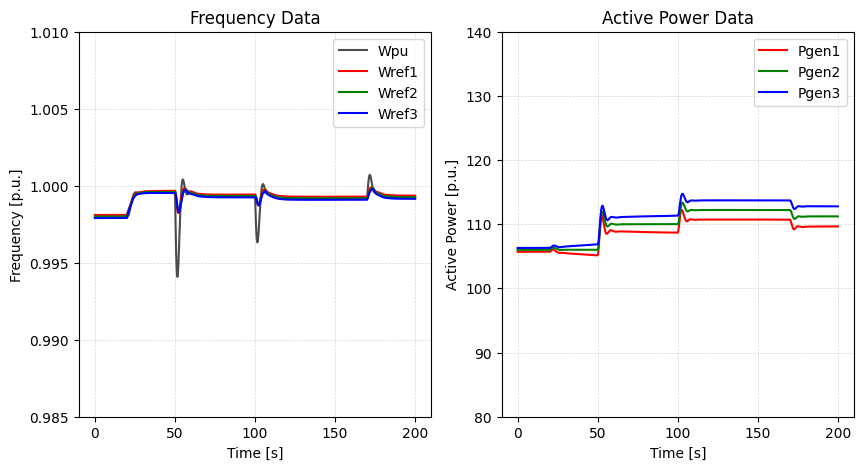

Draw Graph Time: 10.473000288009644 secs


In [10]:
# Control Parameter
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 6.7,
            'ki1': 3.2,
            'ki2': 5,
            'kc1' : 0.01,
            'Tl1' : 1.76
           }

Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])

#scenario = 'secondPI'
scenario = 'nudge'
#scenario = 'droop'
load_pattern = [90,110,110, 101]
case_dict = {'Ngen':3, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200, 'Tsamp':1/1000,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat, 'input_flag': True, 'load_pattern': load_pattern}

X_nudge8, U = run_timeseries(gen_dict, con_dict, case_dict, scenario)
draw_graph(X_nudge8, gen_dict, case_dict, 'nudge')

In [4]:
start = time.time()
#from analyze_stability import lyapunov
#pso = PSO(lyapunov, param_dict)
#pso1 = PSO(common_lyapunov, param_dict)
pso2 = PSO(run_time_minimize, param_dict)
end = time.time()

print("spent time:", end - start)

.0 0 [0.006  3.1941] 79729.6744274
...............................................................................................................1 1 [0.006  3.1941] 79729.6744274
................................................................................................................2 2 [0.006  3.1941] 79729.6744274
........................................................................................................................3 3 [0.006  3.1941] 79729.6744274
.......................................................................................................................................4 0 [0.0149 3.9022] 76968.3020137
..................................................................................................................................................5 0 [0.0144 0.5   ] 76384.4136373
...............................................................................................................................6 0 [0.0142 0.5   ] 76363.2953115
..........

.......................................................................................................58 30 [0.0131 0.5   ] 76306.5924478
Converged the g_best on count_max
.spent time: 444298.4382035732
